In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
analysis_data = pd.read_csv('../Assignment/data/analysis_data_df.csv')
analysis_data.set_index(['stock','year'], inplace=True)
analysis_data

average_return  EBITDA_growth
stock    year                               
3MINDIA  2017        0.000474       0.180535
         2018        0.002309       0.338932
         2019        0.001046       0.080450
         2020       -0.000725      -0.180953
         2021        0.002127      -0.426464
...                       ...            ...
USHAMART 2018        0.000806            NaN
         2019        0.004201            NaN
         2020       -0.003194            NaN
         2021        0.003543      -0.598896
         2022        0.006334       0.460762

[415 rows x 2 columns]

In [3]:
quintile_labels = ['Q' + str(i) for i in range(1,6)]
quintile_labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

In [4]:
# Assigning each Stock and Year combination a Quintile name as per 'EBITDA_growth'
analysis_data['quintile_rank_of_EBITDA_growth'] = analysis_data['EBITDA_growth'].transform(
                                                                          lambda x: pd.qcut(x, 5, labels=quintile_labels))
analysis_data

average_return  EBITDA_growth quintile_rank_of_EBITDA_growth
stock    year                                                              
3MINDIA  2017        0.000474       0.180535                             Q4
         2018        0.002309       0.338932                             Q5
         2019        0.001046       0.080450                             Q3
         2020       -0.000725      -0.180953                             Q1
         2021        0.002127      -0.426464                             Q1
...                       ...            ...                            ...
USHAMART 2018        0.000806            NaN                            NaN
         2019        0.004201            NaN                            NaN
         2020       -0.003194            NaN                            NaN
         2021        0.003543      -0.598896                             Q1
         2022        0.006334       0.460762                             Q5

[415 rows x 3 columns]

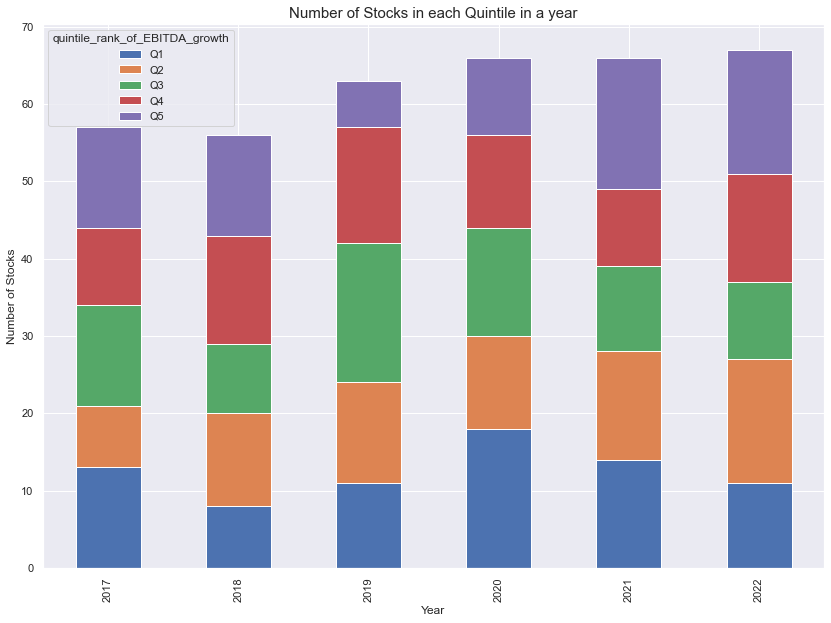

quintile_rank_of_EBITDA_growth,Q1,Q2,Q3,Q4,Q5
year,,,,,
2017,13.0,8.0,13.0,10.0,13.0
2018,8.0,12.0,9.0,14.0,13.0
2019,11.0,13.0,18.0,15.0,6.0
2020,18.0,12.0,14.0,12.0,10.0
2021,14.0,14.0,11.0,10.0,17.0
2022,11.0,16.0,10.0,14.0,16.0
Total,75.0,75.0,75.0,75.0,75.0


In [5]:
quintile_count = pd.DataFrame(analysis_data.groupby(['year', 'quintile_rank_of_EBITDA_growth']).count())
quintile_count.drop(quintile_count.columns[1], axis=1, inplace=True)
quintile_count = quintile_count.unstack()
quintile_count = quintile_count.droplevel(level=0, axis=1)


quintile_count.plot(kind='bar', stacked=True, figsize=(14,10))
plt.title('Number of Stocks in each Quintile in a year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Stocks')
plt.show()

quintile_count.loc['Total',:] = quintile_count.sum()
quintile_count

In [6]:
# Importing the price data with fiscal year
returns_data = pd.read_csv('../Assignment/data/price_data_fiscal.csv')
returns_data.drop(['Quarter'], axis=1, inplace=True)
returns_data['Date'] = pd.to_datetime(returns_data['Date'], dayfirst=True)
returns_data.set_index(['Date','Year'], inplace=True)
returns_data = pd.DataFrame(returns_data.stack())
returns_data = returns_data.swaplevel(i=2,j=1)
returns_data.index.names = ('Date', 'Stock', 'Year')
returns_data.rename(columns={returns_data.columns[0]:'price_return'}, inplace=True)
returns_data

price_return
Date       Stock      Year              
2015-04-06 EICHERMOT  2016     -0.014798
           HCLTECH    2016     -0.009353
           ICICIBANK  2016     -0.005880
           KOTAKBANK  2016      0.026854
           RELIANCE   2016     -0.013636
...                                  ...
2022-03-31 RELINFRA   2022     -0.021777
           SANSERA    2022      0.065821
           SHALBY     2022     -0.018044
           SHOPERSTOP 2022      0.011935
           USHAMART   2022      0.004106

[129504 rows x 1 columns]

In [7]:
# Generating a dataframe of mean daily returns of each Quintile
# Assumption: Annual rebalancing of Quintile portfolio is done.

quintile_returns = pd.DataFrame()
for quintile_name in quintile_labels:
    
    quintile_index = analysis_data[analysis_data['quintile_rank_of_EBITDA_growth'] == quintile_name].index.values
    
    df_quintile = pd.DataFrame()
    for stock_n_year in quintile_index:        
        temp_df = returns_data.loc[pd.IndexSlice[:,stock_n_year[0],stock_n_year[1]], :]

        df_quintile = pd.concat([df_quintile, temp_df], axis=0)
    
    df_quintile = pd.DataFrame(df_quintile.groupby(['Date'])['price_return'].mean())
    df_quintile.rename(columns={'price_return' : (quintile_name + '_returns')}, inplace=True)    
        
    quintile_returns = pd.concat([quintile_returns, df_quintile], axis=1)
    
quintile_returns = quintile_returns.dropna()   # if any
quintile_returns

,Q1_returns,Q2_returns,Q3_returns,Q4_returns,Q5_returns
Date,,,,,
2016-04-01,0.009310,0.021839,0.004354,0.006798,0.002613
2016-04-04,0.017473,0.028851,0.003642,0.008202,0.007667
2016-04-05,-0.017216,-0.007327,-0.007097,-0.016153,-0.017589
2016-04-06,0.013870,0.008288,0.013555,0.013152,0.010385
2016-04-07,0.006986,-0.003523,-0.004034,-0.004755,-0.008985
...,...,...,...,...,...
2022-03-25,-0.006657,-0.009567,-0.002405,-0.010075,-0.009952
2022-03-28,-0.025029,-0.010647,-0.013939,-0.004804,0.008038
2022-03-29,0.007465,0.002978,0.003583,0.010538,0.010818


#### Assumptions:
1. Annual rebalancing of Quintile portfolios are done.
2. Growth in EBITDA in a particular year affects the stock returns of the same year.

----------
## Hypothesis:
> ### In terms of EBITDA growth rate, the top 20% stocks (the portfolio of Q5 stocks) will outperform the bottom 20% (the portfolio of Q1 stocks) over the period of 6 financial years (FY 2016-17 to FY 2021-22)

[Text(0, 0.5, 'Average Standard Deviation')]

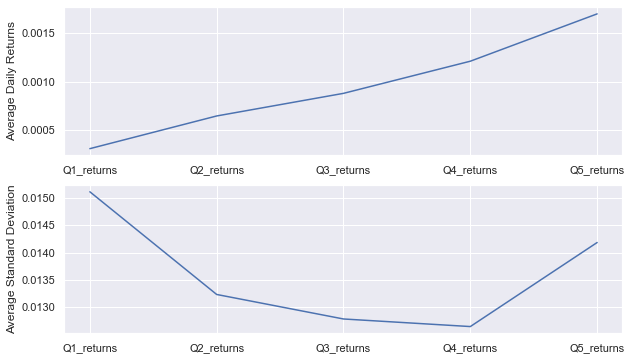

In [8]:
# Plotting the average daily returns and the average volatility of each Quintile
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0].plot(quintile_returns.mean())
ax[0].set(ylabel='Average Daily Returns')

ax[1].plot(quintile_returns.std(ddof=1))
ax[1].set(ylabel='Average Standard Deviation')

Here, the portfolio of Quintile 1 stocks (Q1_returns) has a relatively higher risk than the portfolio of Quintile 5 stocks (Q5_returns) even while having a significantly lower average daily price return.

This goes against the generally accepted theory of *Risk-Reward* relationship i.e. the direct relationship between Stocks Price Returns and Volatility (Risk).

,Q1_returns,Q2_returns,Q3_returns,Q4_returns,Q5_returns
Date,,,,,
2016-04-01,1.009310,1.021839,1.004354,1.006798,1.002613
2016-04-04,1.026783,1.050689,1.007996,1.015000,1.010280
2016-04-05,1.009567,1.043362,1.000898,0.998847,0.992691
2016-04-06,1.023436,1.051650,1.014453,1.011999,1.003076
2016-04-07,1.030422,1.048127,1.010419,1.007244,0.994091
...,...,...,...,...,...
2022-03-25,1.454333,1.951901,2.295426,2.773782,3.483814
2022-03-28,1.429304,1.941254,2.281487,2.768979,3.491852
2022-03-29,1.436769,1.944232,2.285070,2.779516,3.502670


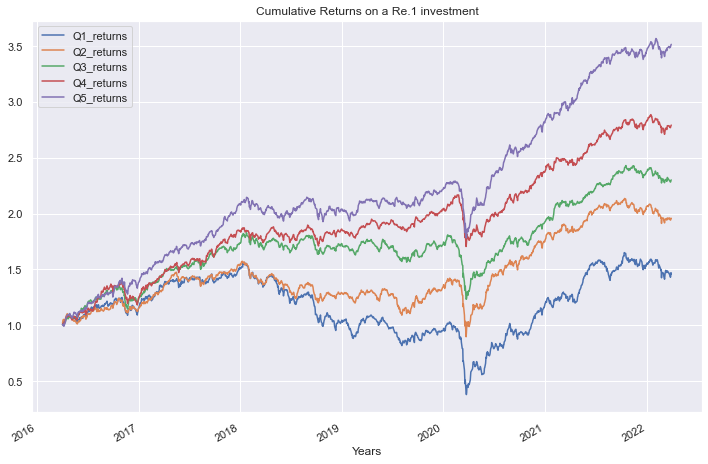

In [9]:
# If we had invested Re. 1 in the beginning of trading date 01-04-2016 in each of the Quintile portfolios.
# How would that Re. 1 fare over the years?
cum_returns = 1 + quintile_returns.cumsum()

# plotting the daily returns of Quintile portfolios
cum_returns.plot(figsize=(12,8), title='Cumulative Returns on a Re.1 investment', xlabel='Years')

cum_returns

In terms of cumulative returns, the portfolio of Quintile 5 stocks performed significantly better than the portfolio of Quintile 1 stocks.

---
## Conducting a test on the mean difference of returns between Quintile 1 and Quintile 5

#### t-Statistic for Mean Difference:
> #### $$tStat = \frac{\bar{d}- \mu _{d0}}{s_{\bar{d}}}$$
> with $n$ - 1 degrees of freedom,  
> 
> where:  
> $n$ = *Number of paired observations*  
> $\mu _{d0}$ = *Hypothesized value for population mean difference*  
> $\bar{d}$ = *Sample mean difference*  
> $s_{\bar{d}}$ = *Standard error of* $\bar{d}$

In [10]:
# Developing a function to perform t-test on mean difference of returns
# port_low means portfolio having low EBITDA growth
# port_high means portfolio having high EBITDA growth

def t_stat(df, port_low, port_high):
    returns_difference = df[port_high] - df[port_low]
    mean_returns_difference = returns_difference.mean()
    sd_returns_difference = returns_difference.std(ddof=1)
    n = len(df)
    
    # Generally, hypothesized value of population mean variance is considered as Zero
    tStat = (mean_returns_difference - 0) / (sd_returns_difference / np.sqrt(n))
    
    print('t-Statistic:', tStat)
    
    if np.abs(tStat) > 1.96:   # t-statistic for 95% confidence interval
        print('We reject the null hypothesis that there is no difference in returns of Q5 stocks and returns of Q1 stocks')
        print('Mean difference in returns is significant.')
    else:
        print('We accept the null hypothesis that there is no difference in returns of Q5 stocks and returns of Q1 stocks')
        print('Mean difference in returns is insignificant.')

In [11]:
t_stat(df=quintile_returns, port_low='Q1_returns', port_high='Q5_returns')

t-Statistic: 5.258568229240252
We reject the null hypothesis that there is no difference in returns of Q5 stocks and returns of Q1 stocks
Mean difference in returns is significant.


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
#### There is a STRONG evidence to support the notion that the returns of the companies with higher EBITDA growth *(Quintile 5)* is ***`statistically greater`*** than the returns of companies with lower EBITDA growth *(Quintile 1)*.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

----
## Calculating the excess returns over and above the market returns using a Long-Short Equity Investment Strategy

> "*Long-short equity is an investing strategy that takes long postiions in stocks that are expected to appreciate and short positions in stocks that are expected to decline.*" - Investopedia

The long-short equity strategy is used by hedge funds (in India, "Category III - Alternative Investment Funds") which seeks to minimise market exposure while profiting from stock gains in the long positions, along with price declines in the short positions. Usually, this strategy is used with a relatively long bias - for example, a 130/30 strategy where 130% of AUM (Assets under Management)(100% from initial capital and 30% from selling securities) is used to buy stocks/securities and 30% is shorting the securities.

For the purpose of this analysis, we will use a simpler 50/50 strategy where exposure in both long positions and short positions will be 50% each.

We will be using the Jensen's Alpha "$\alpha$" i.e. expected returns over and above the CAPM (Capital Asset Pricing Model) return, as a reference for the excess returns earned using the long-short strategy over and above the market returns, assuming there are no other factors affecting the excess returns. 

#### General form of the CAPM:
> #### $$E[r_{i}] = r_{f}+\beta_{i}(E[r_{m}]-r_{f})$$

#### Jensen's Alpha:
>#### <center>Alpha = Expected Return of the Asset/Investment - Expected Return using CAPM</center>
>#### <center>$\therefore \alpha = E[r_{i}]-$ Expected Return using CAPM</center>
>#### $$\therefore \alpha = E[r_{i}]-(r_{f}+\beta_{i}(E[r_{m}]-r_{f}))$$
>#### $$\therefore \alpha = E[r_{i}]-r_{f}-\beta_{i}(E[r_{m}]-r_{f})$$
#### Rearranging the equation for analysis:
> #### $$E[r_{i}]-r_{f} = \alpha+\beta_{i}(E[r_{m}]-r_{f})$$
> where:  
> $\alpha$ = Excess return over and above the market index  
> $E[r_{i}]$ = Expected return on the asset or investment $i$  
> $E[r_{m}]$ = Expected return of the market index  
> $r_{f}$ = Risk-free rate  
> $\beta_{i}$ = Systematic risk (Beta of the asset or investment $i$ with respect to the chosen market index)  
#### We substitute $E[r_{i}]-r_{f}$  with $r_{Q5}-r_{Q1}$ (Returns generated using the long-short equity strategy):
> #### $$r_{Q5}-r_{Q1} = \alpha+\beta_{r_{Q5}-r_{Q1}}(r_{m}-r_{f})$$
> where:  
> $r_{Q5}$ = Returns from portfolio of Quintile 5 stocks  
> $r_{Q1}$ = Returns from portfolio of Quintile 1 stocks  

* For $E[r_{m}]$, we replaced it with $r_{m}$ since we will be using historical returns of *NIFTY500* as the basis.  
* For $r_{f}$, we will use *7-Year Government of India* Bond yield.  
* For $r_{Q5}-r_{Q1}$, we will take difference of 'Q5_returns' and 'Q1_returns' from the '*quintile_returns*' dataframe.  
* $\alpha$ and $\beta_{r_{Q5}-r_{Q1}}$ will be generated by the OLS model.
* $r_{m}-r_{f}$ is also called as 'Equity Risk Premium', the name we will use in the analysis. 

In [12]:
# Downloading 'NIFTY500' market index data using 'yfinance' API
import yfinance as yf
nifty500 = yf.download('^CRSLDX', start = "2015-04-01", end = "2022-04-01")
nifty500 = pd.DataFrame(nifty500['Adj Close'])
nifty500

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2015-04-01,7060.200195
2015-04-06,7126.750000
2015-04-07,7144.399902
2015-04-08,7193.600098
2015-04-09,7234.000000
...,...
2022-03-25,14651.700195
2022-03-28,14675.849609
2022-03-29,14761.900391


In [13]:
# Calculating daily percentage change of 'NIFTY500' index
nifty500_returns = nifty500.pct_change(1, fill_method=None)
nifty500_returns.rename(columns={nifty500_returns.columns[0]:'NIFTY500'}, inplace=True)
nifty500_returns = nifty500_returns.loc['2016-04-01' : '2022-03-31']
nifty500_returns

,NIFTY500
Date,
2016-04-01,-0.001031
2016-04-04,0.005291
2016-04-05,-0.018713
2016-04-06,0.003090
2016-04-07,-0.007557
...,...
2022-03-25,-0.003242
2022-03-28,0.001648
2022-03-29,0.005863


In [14]:
# For risk-free rate - India 7 Year Government bond yield 
# Data Gathered from "https://in.investing.com/rates-bonds/india-7-year-bond-yield-historical-data"

bond_df = pd.read_csv('../Assignment/data/India 7-Year Bond Yield Historical Data.csv')
bond_df['Date'] = pd.to_datetime(bond_df['Date'])
bond_df.drop(bond_df.columns[2:7], axis=1, inplace=True)
bond_df.rename(columns={'Price':'7Y_bond'}, inplace=True)

# discounting the annual bond yields to daily bond yields assuming there are 248 days in a year
bond_df['7Y_bond'] = ((1 + (bond_df['7Y_bond'] / 100)) ** (1/248)) - 1
bond_df.set_index(['Date'], inplace=True)
bond_df = bond_df.sort_index(axis=0, ascending=True)
bond_df

,7Y_bond
Date,
2016-04-04,0.000300
2016-04-05,0.000300
2016-04-06,0.000298
2016-04-07,0.000298
2016-04-11,0.000295
...,...
2022-03-25,0.000263
2022-03-28,0.000263
2022-03-29,0.000263


* ### Merging the 'quintile_returns', 'nifty500_returns' and 'bond_df' dataframes

In [15]:
# Merging the NIFTY 500 returns data with 'quintile_returns' dataframe
merger1 = pd.merge(quintile_returns, nifty500_returns, on=nifty500_returns.index.names, how='inner')
merger1

,Q1_returns,Q2_returns,Q3_returns,Q4_returns,Q5_returns,NIFTY500
Date,,,,,,
2016-04-01,0.009310,0.021839,0.004354,0.006798,0.002613,-0.001031
2016-04-04,0.017473,0.028851,0.003642,0.008202,0.007667,0.005291
2016-04-05,-0.017216,-0.007327,-0.007097,-0.016153,-0.017589,-0.018713
2016-04-06,0.013870,0.008288,0.013555,0.013152,0.010385,0.003090
2016-04-07,0.006986,-0.003523,-0.004034,-0.004755,-0.008985,-0.007557
...,...,...,...,...,...,...
2022-03-25,-0.006657,-0.009567,-0.002405,-0.010075,-0.009952,-0.003242
2022-03-28,-0.025029,-0.010647,-0.013939,-0.004804,0.008038,0.001648
2022-03-29,0.007465,0.002978,0.003583,0.010538,0.010818,0.005863


In [16]:
# Merging the Bond yield data with the 'merger1' dataframe
merger2 = pd.merge(merger1, bond_df, on=bond_df.index.names, how='inner')
merger2

,Q1_returns,Q2_returns,Q3_returns,Q4_returns,Q5_returns,NIFTY500,7Y_bond
Date,,,,,,,
2016-04-04,0.017473,0.028851,0.003642,0.008202,0.007667,0.005291,0.000300
2016-04-05,-0.017216,-0.007327,-0.007097,-0.016153,-0.017589,-0.018713,0.000300
2016-04-06,0.013870,0.008288,0.013555,0.013152,0.010385,0.003090,0.000298
2016-04-07,0.006986,-0.003523,-0.004034,-0.004755,-0.008985,-0.007557,0.000298
2016-04-11,0.011476,0.000410,0.010856,0.005487,0.020730,0.013227,0.000295
...,...,...,...,...,...,...,...
2022-03-25,-0.006657,-0.009567,-0.002405,-0.010075,-0.009952,-0.003242,0.000263
2022-03-28,-0.025029,-0.010647,-0.013939,-0.004804,0.008038,0.001648,0.000263
2022-03-29,0.007465,0.002978,0.003583,0.010538,0.010818,0.005863,0.000263


In [17]:
# Preparing 'ols_data' dataframe for the analysis
ols_data = merger2.copy()
ols_data['equity_risk_premium'] = ols_data['NIFTY500'] - ols_data['7Y_bond']
ols_data['long_short_strategy_returns'] = ols_data['Q5_returns'] - ols_data['Q1_returns']
ols_data.drop(ols_data.columns[0:7], axis=1, inplace=True)
ols_data

,equity_risk_premium,long_short_strategy_returns
Date,,
2016-04-04,0.004991,-0.009806
2016-04-05,-0.019012,-0.000372
2016-04-06,0.002792,-0.003485
2016-04-07,-0.007855,-0.015971
2016-04-11,0.012932,0.009254
...,...,...
2022-03-25,-0.003504,-0.003295
2022-03-28,0.001385,0.033067
2022-03-29,0.005601,0.003353


* ### Applying regression on 'ols_data' dataframe

In [18]:
import statsmodels.api as sm

dep_var_ols = ols_data['long_short_strategy_returns']
inde_var_ols = ols_data['equity_risk_premium']
inde_var_ols = sm.add_constant(inde_var_ols)

ols_model = sm.OLS(endog=inde_var_ols, exog=dep_var_ols)
ols_result = ols_model.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     long_short_strategy_returns   R-squared:                       0.009
Model:                                     OLS   Adj. R-squared:                  0.008
Method:                          Least Squares   F-statistic:                     12.61
Date:                         Wed, 25 Jan 2023   Prob (F-statistic):           0.000396
Time:                                 09:08:47   Log-Likelihood:                 4593.6
No. Observations:                         1448   AIC:                            -9183.
Df Residuals:                             1446   BIC:                            -9173.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0015      0.000      5.471      0.000       0.001       0.002
equity_risk_premium    -0.0866      0.024     -3.551      0.000      -0.135      -0.039
==============================================================================
Omnibus:                       43.357   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.506
Skew:                           0.181   Prob(JB):                     1.64e-19
Kurtosis:                       4.141   Cond. No.                         91.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Observations from the OLS regression:

> Based on the regression results, the linear relationship between long-short strategy returns and equity risk premium can be mathematically written as:
> #### $$r_{Q5}-r_{Q1} = 0.0015-0.0866(r_{m}-r_{f})$$
> which is in the form: 
> #### $$r_{Q5}-r_{Q1} = \alpha+\beta_{r_{Q5}-r_{Q1}}(r_{m}-r_{f})$$
> where:  
> $r_{Q5}-r_{Q1}$ = Long-short strategy return  
> $r_{m}-r_{f}$ = Equity risk premium  
> $\alpha$ = Excess return using the strategy = $0.0015$  
> $\beta_{r_{Q5}-r_{Q1}}$ = Sensitivity of the strategy to market index = $-0.0866$

> The *OLS* results show that **the causal relationship between 'long_short_strategy_returns' and 'equity_risk_premium' is statistically significant** with the p-value of 'equity_risk_premium' being significantly less than 0.05. But, **the relationship is inverse** since the Beta ($\beta_{r_{Q5}-r_{Q1}}$) (coefficient of equity risk premium i.e. sensitivity of the strategy to *NIFTY500* index) is $-0.0866$.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

* ### Jensen's Alpha of the Long-Short equity strategy

In [19]:
# Annualising the daily alpha calculated from the regression
alpha_strategy = ((1 + ols_result.params[0]) ** 248) - 1   # Assuming there are 248 trading days in a year
print('Annualised Alpha expected using the Long-short strategy is {}%.'.format(round((alpha_strategy*100), 4)))

Annualised Alpha expected using the Long-short strategy is 43.5749%.


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Conclusion:
By using the *long-short equity strategy* on stocks, excess return which can be generated over and above the market return is **43.5749%**.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

--------
## References:
* ***Data-Driven Investing with Python | Financial Data Science*** - by Fervent #LearnWithDistinction  
(https://www.udemy.com/course/data-driven-investing-with-python-financial-data-science/)
* ***Equity Valuation: Concepts and Basic Tools - Corporate Finance and Equity*** - CFA® Program Curriculum, 2020 Level I
* ***Long-Short Equity: What It Is, How It Works in Investing Strategy*** - by James Chen  
(https://www.investopedia.com/terms/l/long-shortequity.asp)

* ***What Is Jensen's Measure (Alpha), and How Is It Calculated?*** - by James Chen  
(https://www.investopedia.com/terms/j/jensensmeasure.asp)